In [23]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

api_key = 'a7491f910b4c4afd9b706233fe05bbec'

url = 'https://newsapi.org/v2/everything'
params = {
    'q': 'Zara',                # Palavra-chave
    'language': 'pt',          # Idioma das notícias   
    'sortBy': 'relevancy',     # Ordenação
    'pageSize': 100,           # Máximo por página
    'apiKey': api_key,          # Chave da API
}

response = requests.get(url, params=params)
data = response.json()
print(data)

{'status': 'ok', 'totalResults': 41, 'articles': [{'source': {'id': None, 'name': 'Observador.pt'}, 'author': 'Carolina Sobral', 'title': 'Zara celebra 50 anos com filme com 50 ícones', 'description': 'Foi há 50 anos, a 9 de maio, que a primeira loja Zara abriu. Para assinalar, há uma nova coleção com 128 peças que celebra o amor e a criatividade, junto de um filme protagonizado por 50 modelos.', 'url': 'https://observador.pt/2025/05/09/zara-celebra-50-anos-com-nova-colecao-e-filme-de-steven-meisel-protagonizado-por-50-modelos-iconicas/', 'urlToImage': 'https://wm.observador.pt/wm/l/https%3A%2F%2Fbordalo.observador.pt%2Fv2%2Frs%3Afill%3A770%3A403%2Fc%3A4096%3A2298%3Anowe%3A0%3A182%2Fq%3A70%2Ff%3Awebp%2Fplain%2Fhttps%3A%2F%2Fs3.observador.pt%2Fwp-content%2Fuploads%2F2025%2F05%2F09121526%2F50-years-50-icons-still-681cf53ce38d7-scaled.jpg?layer=obstop:T', 'publishedAt': '2025-05-09T11:33:06Z', 'content': '“50 anos, 50 ícones”. É assim que a Zara vai celebrar cinco décadas de vida, esta se

In [24]:
articles = data['articles']
df = pd.DataFrame(articles)[['source', 'author', 'title', 'description', 'url', 'publishedAt']]
df.head()

,source,author,title,description,url,publishedAt
0,"{'id': None, 'name': 'Observador.pt'}",Carolina Sobral,Zara celebra 50 anos com filme com 50 ícones,"Foi há 50 anos, a 9 de maio, que a primeira lo...",https://observador.pt/2025/05/09/zara-celebra-...,2025-05-09T11:33:06Z
1,"{'id': None, 'name': 'Observador.pt'}",Joana Moreira,Cinco espectáculos para ver em junho,"De coreografias poéticas a sátiras ferozes, há...",https://observador.pt/2025/06/02/ser-pai-no-ap...,2025-06-02T06:28:30Z
2,"{'id': None, 'name': 'Abril.com.br'}",Simone Blanes,O que se sabe sobre o projeto de lei na França...,Proposta pretende regular a venda de produtos ...,https://veja.abril.com.br/comportamento/o-que-...,2025-06-04T12:59:01Z
3,"{'id': None, 'name': 'Tudocelular.com'}",Tudocelular.com,Linux Mint 22.2 tem codinome revelado e deve s...,O sistema operacional será baseado no Ubuntu 2...,https://www.tudocelular.com/software/noticias/...,2025-05-11T08:56:00Z
4,"{'id': None, 'name': 'Terra.com.br'}",Porto Alegre 24 horas,Iguatemi promove ação especial de lançamento d...,São mais de 600 itens oferecidos pelas lojas p...,https://www.terra.com.br/noticias/iguatemi-pro...,2025-05-20T20:00:31Z


In [ ]:
def analisar_sentimento(texto):
    if not texto:
        return 0
    blob = TextBlob(texto)
    return blob.sentiment.polarity

df['sentimento'] = df['description'].apply(analisar_sentimento)

def classificar_polaridade(polaridade):
    if polaridade > 0.1:
        return 'positivo'
    elif polaridade < -0.1:
        return 'negativo'
    else:
        return 'neutro'

df['classificacao'] = df['sentimento'].apply(classificar_polaridade)

In [27]:
df[['title', 'description', 'sentimento', 'classificacao']]

,title,description,sentimento,classificacao
0,Zara celebra 50 anos com filme com 50 ícones,"Foi há 50 anos, a 9 de maio, que a primeira lo...",0.000000,neutro
1,Cinco espectáculos para ver em junho,"De coreografias poéticas a sátiras ferozes, há...",0.000000,neutro
2,O que se sabe sobre o projeto de lei na França...,Proposta pretende regular a venda de produtos ...,0.100000,neutro
3,Linux Mint 22.2 tem codinome revelado e deve s...,O sistema operacional será baseado no Ubuntu 2...,0.600000,positivo
4,Iguatemi promove ação especial de lançamento d...,São mais de 600 itens oferecidos pelas lojas p...,0.118182,positivo
5,Quem são as 10 pessoas mais ricas do mundo em ...,Os dez maiores bilionários do mundo aumentaram...,0.000000,neutro
6,'Faturou no ano o que a gente fatura em 2h': s...,Comentário sobre excesso de promoções da 'WePi...,-0.125000,negativo
7,Vialonga. Festival Sotaques começa esta sexta,O festival acontece no Parque Urbano Quinta da...,0.000000,neutro
8,None,Um Festival de Cannes como nenhum outro. Ao me...,0.000000,neutro
9,A metamorfose de Pedro Janot: do varejo à avia...,"Após um acidente que o deixou tetraplégico, ex...",0.250000,positivo


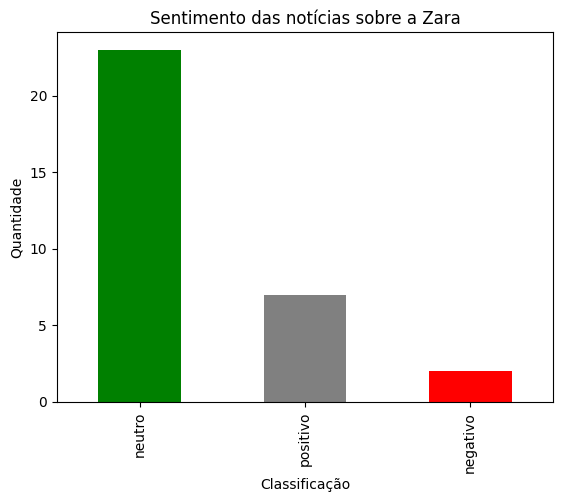

In [ ]:
df['classificacao'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentimento das notícias sobre a Zara')
plt.xlabel('Classificação')
plt.ylabel('Quantidade')
plt.show()